In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv", header=0)
print(data.info())
print(data.head())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [5]:
# BMI 계산
data["BMI"] = data["Weight"] / (data["Height"] ** 2)

data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,BMI
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,24.386526
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,23.765432
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I,26.851852
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [7]:
data_ori = data.copy()
data_ori

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,BMI
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,24.386526
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,23.765432
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I,26.851852
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


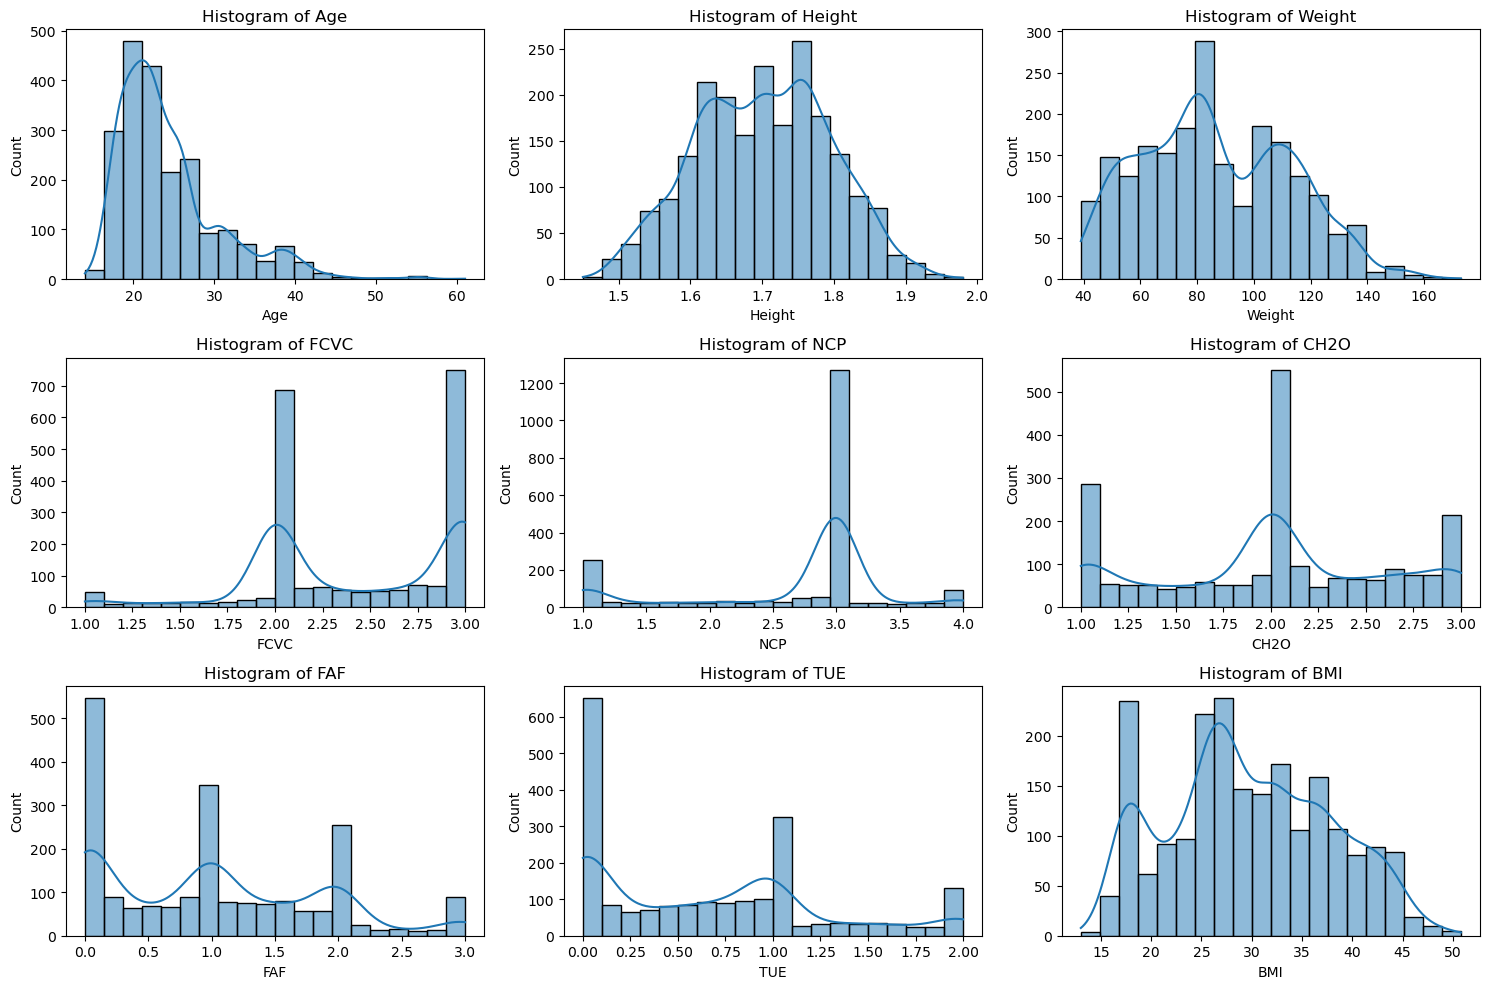

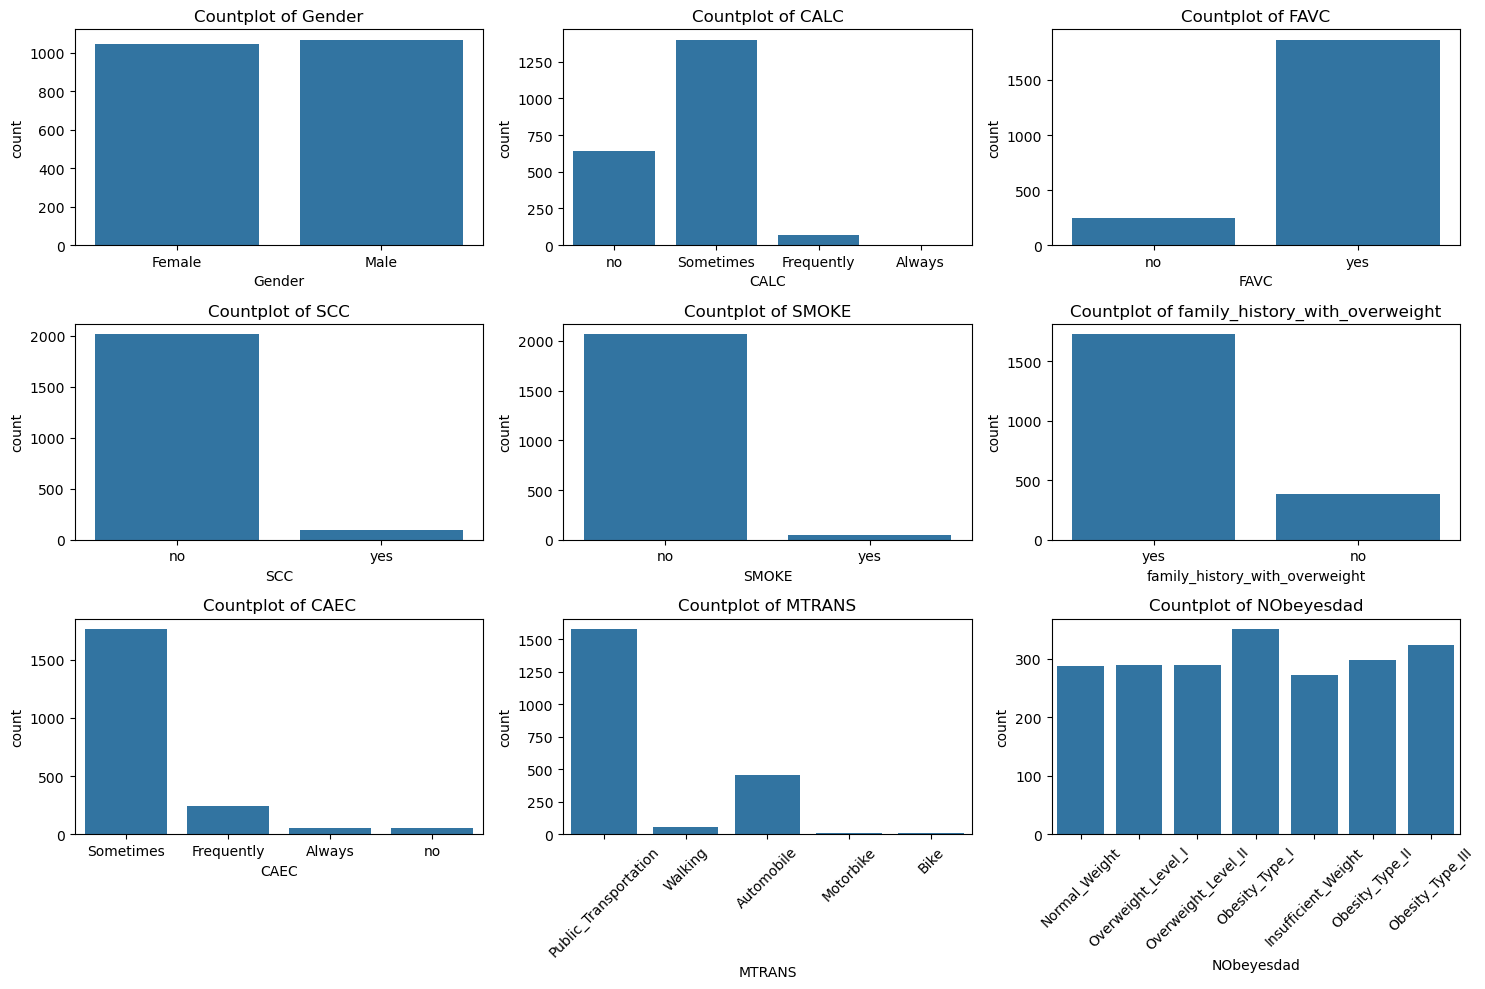

In [11]:
# Histogram with Continuous variables
continuous_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.savefig("data_info2")
plt.show()

# Histogram with Categorical variables
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=data[col])
    plt.title(f'Countplot of {col}')
    
    if col in ['MTRANS', 'NObeyesdad']:
        plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("data_info")
plt.show()


In [417]:
# Categorical value into numerical values using one-hot encoding or label encoding.
le = LabelEncoder()
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   int64  
 12  FAF                             21

In [15]:
data_scaled = data.copy()

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
data_scaled[continuous_columns] = scaler.fit_transform(data_scaled[continuous_columns])

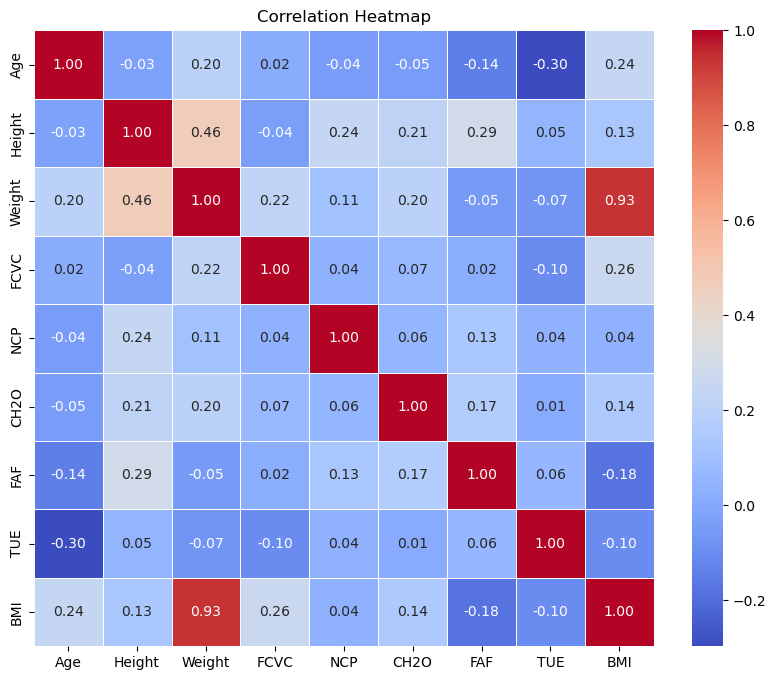

In [21]:
# Correlation heatmap
continuous_columns = data_scaled.select_dtypes(include=['float64']).columns
correlation_matrix = data_scaled[continuous_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap')
plt.show()


In [393]:
🧠 추가 팁: BMI 기준 (WHO)

BMI 범위	분류
< 18.5	저체중
18.5–24.9	정상
25–29.9	과체중
30–34.9	비만 1단계
35–39.9	비만 2단계
≥ 40	고도 비만

SyntaxError: invalid character '🧠' (U+1F9E0) (800995568.py, line 1)

In [425]:
data_scaled

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,BMI
0,-0.522124,0,-0.875589,-0.862558,3,0,-0.785019,0.404153,0,0,-0.013073,1,-1.188039,0.561997,2,3,1,-0.663421
1,-0.522124,0,-1.947599,-1.168077,2,0,1.088342,0.404153,1,1,1.618759,1,2.339750,-1.080625,2,3,1,-0.681937
2,-0.206889,1,1.054029,-0.366090,1,0,-0.785019,0.404153,0,0,-0.013073,1,1.163820,0.561997,2,3,1,-0.740967
3,0.423582,1,1.054029,0.015808,1,0,1.088342,0.404153,0,0,-0.013073,0,1.163820,-1.080625,2,4,5,-0.355619
4,-0.364507,1,0.839627,0.122740,2,0,-0.785019,-2.167023,0,0,-0.013073,0,-1.188039,-1.080625,2,3,6,-0.169522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.525774,0,0.097045,1.711763,2,1,1.088342,0.404153,0,0,-0.456705,1,0.783135,0.407996,2,3,4,1.897925
2107,-0.367195,0,0.502844,1.800914,2,1,1.088342,0.404153,0,0,-0.004702,1,0.389341,-0.096251,2,3,4,1.753152
2108,-0.281909,0,0.541672,1.798868,2,1,1.088342,0.404153,0,0,0.075361,1,0.474971,-0.019018,2,3,4,1.728418
2109,0.007776,0,0.404927,1.785780,2,1,1.088342,0.404153,0,0,1.377801,1,0.151471,-0.117991,2,3,4,1.794305


In [427]:
# 랜덤포레스트로 중요 변수 파악
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ✅ 타겟 분리
y = data_ori["NObeyesdad"]

# ✅ 입력 변수 준비: 'NObeyesdad' 제외한 나머지 전부
X = data_ori.drop(columns=["NObeyesdad"])

# ✅ Label Encoding (범주형 변수 처리)
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# ✅ 스케일링 (선택, 중요도 순위엔 큰 영향 없지만 해두면 나중에 바로 사용 가능)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# ✅ 랜덤포레스트로 중요도 분석
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# ✅ 상위 8개 변수 출력
top_features = importances.head(8).index.tolist()

print("🎯 변수 중요도 상위 8개:")
print(top_features)


🎯 변수 중요도 상위 8개:
['BMI', 'Weight', 'Gender', 'FCVC', 'Height', 'Age', 'NCP', 'CH2O']


In [429]:
# 중요도 수치 출력 (내림차순 정렬)
importances_df = importances.sort_values(ascending=False).round(4).reset_index()
importances_df.columns = ["Feature", "Importance"]
display(importances_df)

top_vars = importances_df["Feature"][:6].tolist()
X_cluster = data[top_vars]


,Feature,Importance
0,BMI,0.4216
1,Weight,0.2036
2,Gender,0.0604
3,FCVC,0.0601
4,Height,0.0484
5,Age,0.0463
6,NCP,0.0293
7,CH2O,0.0207
8,TUE,0.0206
9,CAEC,0.0185


/var/folders/04/rs7rc_n15rl_bkvq74vv7l2m0000gn/T/ipykernel_18797/200713501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis", hue=None, legend=False)


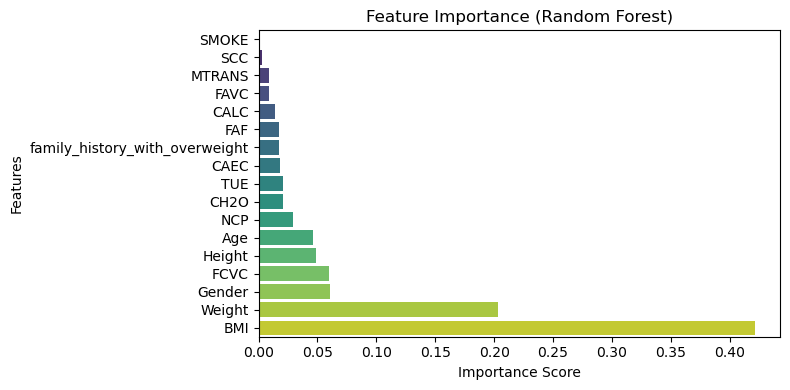

In [431]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 중요도 가져오기 (이미 학습된 rf 모델 기준)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

# 시각화
plt.figure(figsize=(8, 4))
sns.barplot(x=importances.values, y=importances.index, palette="viridis", hue=None, legend=False)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

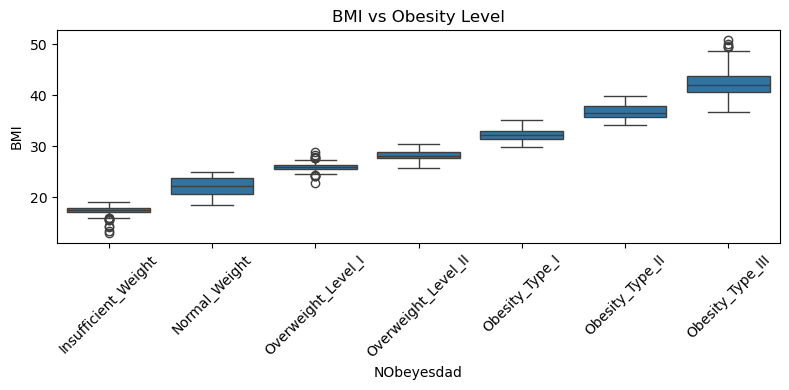

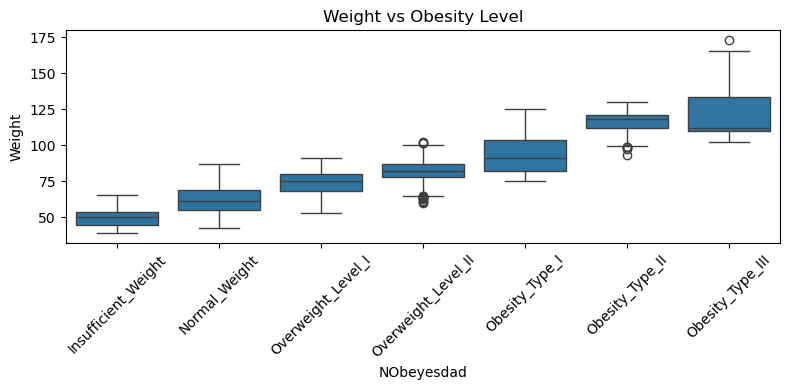

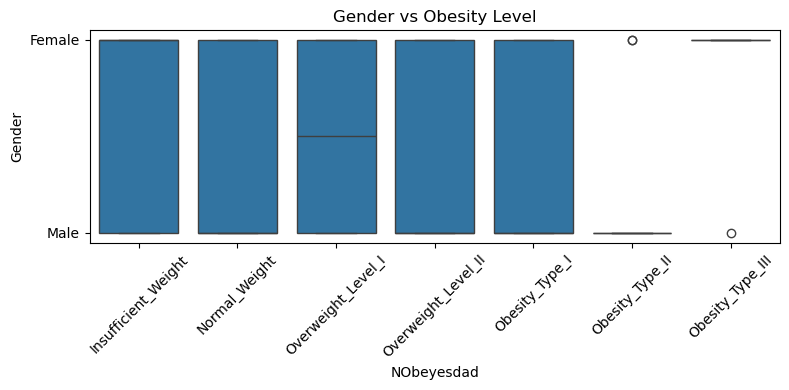

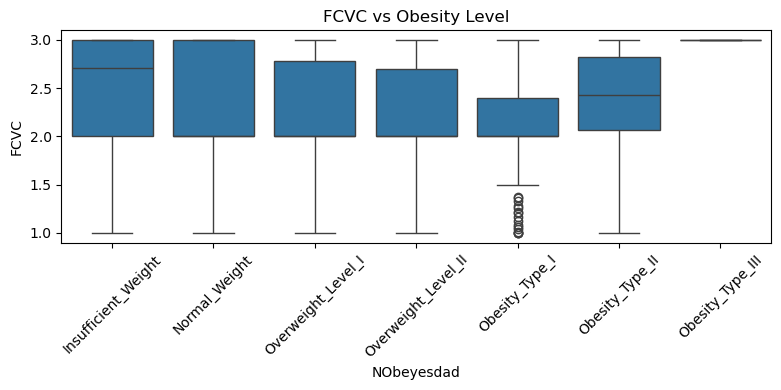

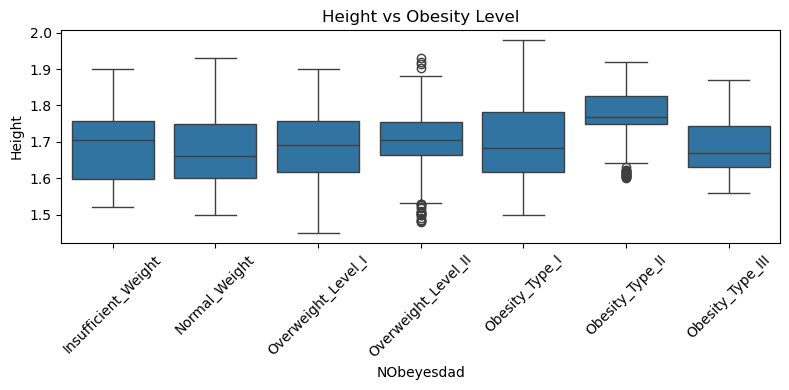

In [435]:
for col in importances_df["Feature"][:5]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data_ori, x="NObeyesdad", y=col, order=obesity_order)
    plt.title(f"{col} vs Obesity Level")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/var/folders/04/rs7rc_n15rl_bkvq74vv7l2m0000gn/T/ipykernel_18797/2437405679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


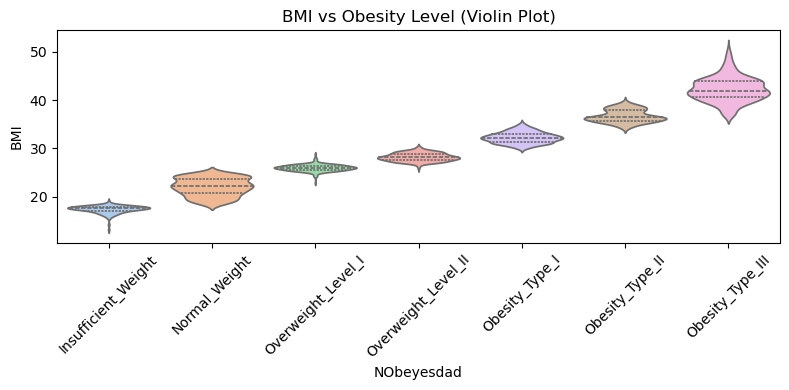

/var/folders/04/rs7rc_n15rl_bkvq74vv7l2m0000gn/T/ipykernel_18797/2437405679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


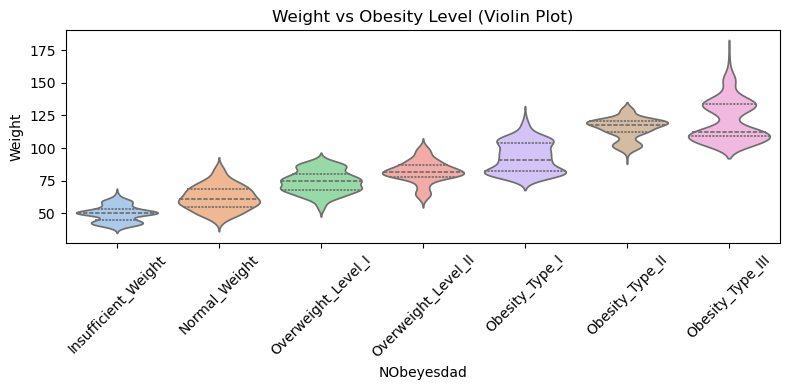

/var/folders/04/rs7rc_n15rl_bkvq74vv7l2m0000gn/T/ipykernel_18797/2437405679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


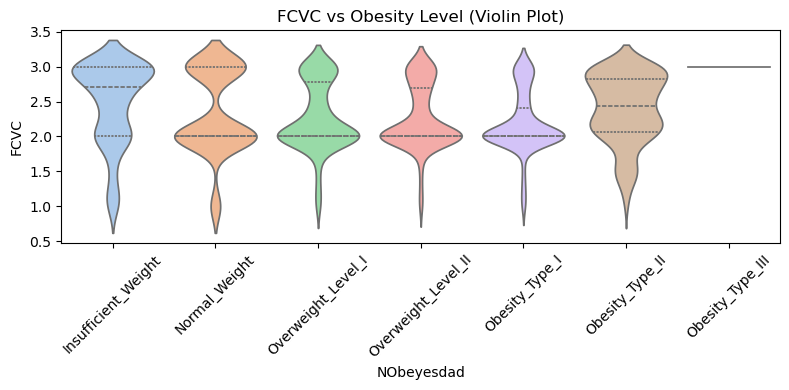

/var/folders/04/rs7rc_n15rl_bkvq74vv7l2m0000gn/T/ipykernel_18797/2437405679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


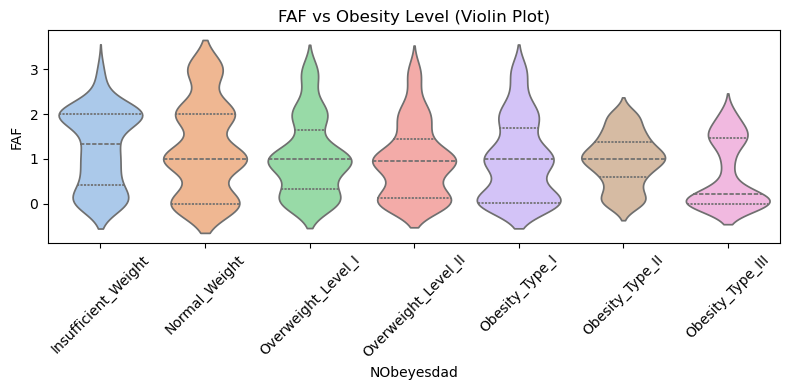

/var/folders/04/rs7rc_n15rl_bkvq74vv7l2m0000gn/T/ipykernel_18797/2437405679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


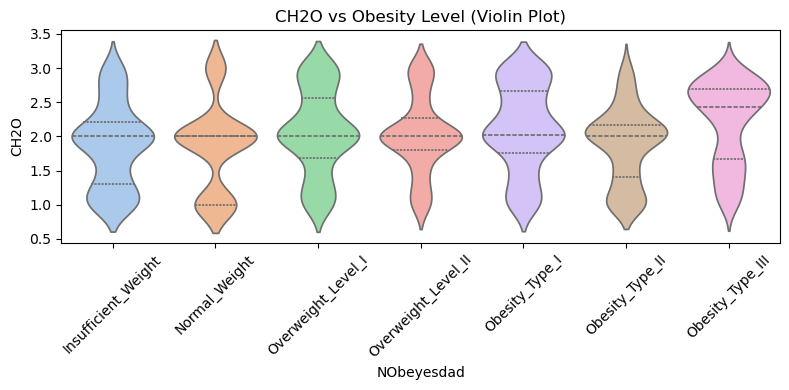

In [439]:
for col in ["BMI", "Weight", "FCVC", "FAF", "CH2O"]:
    plt.figure(figsize=(8, 4))
    sns.violinplot(
        data=data_ori, 
        x="NObeyesdad", 
        y=col, 
        order=obesity_order, 
        inner="quartile", 
        palette="pastel"
    )
    plt.title(f"{col} vs Obesity Level (Violin Plot)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


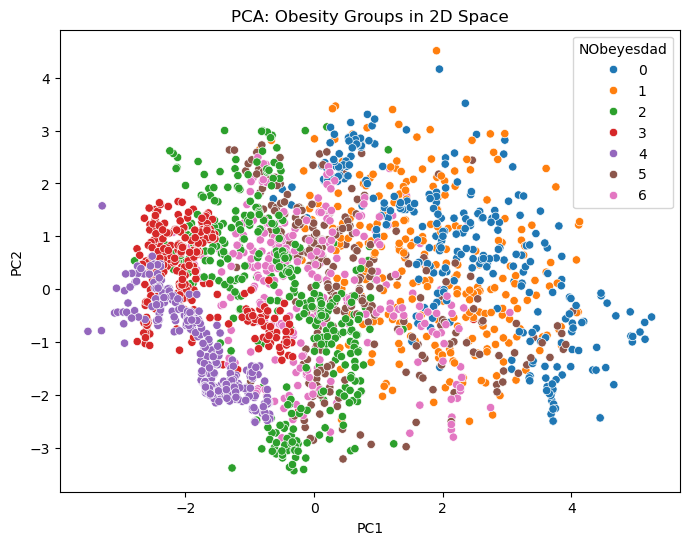

In [441]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data["NObeyesdad"], palette="tab10")
plt.title("PCA: Obesity Groups in 2D Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [443]:
# 각 변수들이 PC1, PC2에 얼마나 기여했는지 확인
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=["PC1", "PC2"])
display(pca_components.T.sort_values("PC1", ascending=False).head(5))


,PC1,PC2
SCC,0.192804,0.000932
CALC,0.133236,0.026439
MTRANS,0.110039,0.110611
TUE,0.066990,0.238604
FAF,0.029880,0.419330


In [17]:
# Clustering 

from sklearn.cluster import KMeans

# 군집 수 정하기 (우선 4로 시작)
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(data)

# 클러스터 결과 확인
print(data['cluster'].value_counts())


/opt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
0    674
1    637
3    421
2    379
Name: count, dtype: int64


In [19]:
cluster_summary = data.groupby('cluster').mean()
print(cluster_summary)


              Age    Gender    Height    Weight      CALC      FAVC      FCVC  \
cluster                                                                         
0       -0.076248  0.491098  0.317367  1.078079  2.212166  0.985163  0.454803   
1       -0.582677  0.389325 -0.276369 -1.016409  2.411303  0.805338 -0.119298   
2        1.576323  0.614776  0.043147  0.182076  2.216359  0.923483 -0.163969   
3       -0.415367  0.608076 -0.128768 -0.351971  2.190024  0.805226 -0.400000   

              NCP       SCC     SMOKE      CH2O  \
cluster                                           
0        0.146142  0.002967  0.022255  0.231798   
1        0.070959  0.081633  0.023548 -0.252018   
2       -0.081204  0.010554  0.026385 -0.119827   
3       -0.268229  0.090261  0.009501  0.118095   

         family_history_with_overweight       FAF       TUE      CAEC  \
cluster                                                                 
0                              0.994065 -0.118635 -0.026578 

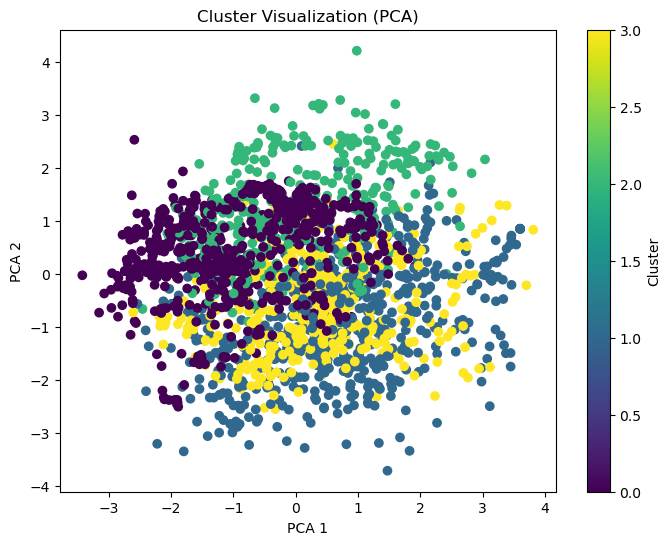

In [21]:
# 클러스터 시각화
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA로 2차원 축소
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data[continuous_columns])

# 시각화
plt.figure(figsize=(8,6))
plt.scatter(pca_components[:,0], pca_components[:,1], c=data['cluster'], cmap='viridis')
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


In [23]:
# 각 클러스터 요약문 리스트로 저장
cluster_descriptions = [
    "이 그룹은 비교적 젊고 체중이 많이 나가며 과식을 자주 한다. 운동은 평균보다 조금 덜 하며, 대부분 과체중 혹은 비만 상태다.",
    "이 그룹은 젊고 체중이 가볍다. 물을 적게 마시지만 운동을 어느 정도 하며, 대부분 정상 체중이다.",
    "이 그룹은 나이가 많고 체중이 평균보다 무겁다. 운동을 거의 하지 않으며 과체중 또는 비만인 경우가 많다.",
    "이 그룹은 젊고 평균보다 가벼운 체중을 가지며 물을 적당히 마시고 운동도 평균 수준으로 한다. 대부분 정상 체중이지만 일부는 과체중 경계에 있다."
]


In [31]:
pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sentence_transformers import SentenceTransformer

try:
    model = SentenceTransformer('all-MiniLM-L6-v2')
except Exception as e:
    print(f"Error loading model: {e}")


In [37]:
from sentence_transformers import SentenceTransformer
import os

cache_dir = os.path.join(os.path.expanduser("~"), ".cache", "sentence_transformers")
if os.path.exists(cache_dir):
    os.rmdir(cache_dir)  # or use shutil.rmtree(cache_dir)

model = SentenceTransformer('all-MiniLM-L6-v2')
